In [ ]:
import numpy as np
import pandas as pd
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
#from pycaret.regression import setup, compare_models
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
#from helper_functions import prepare_data, replace_strings
from pprint import pprint

In [ ]:
%pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [ ]:
!python -m pip uninstall matplotlib


Found existing installation: matplotlib 3.6.0
Uninstalling matplotlib-3.6.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.0-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.6.0


In [ ]:
!pip install matplotlib==3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.5.0 requires matplotlib<3.7,>=3.2, but you have matplotlib 3.1.3 which is incompatible.
dtale 2.9.0 requires matplotlib==3.6.0; python_version == "3.8", but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dtale 2.9.0 requires matplotlib==3.6.0; python_version == "3.8", but you have matplotlib 3.6.2 which is incompatible.


In [ ]:
!pip install pycaret pandas shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imbalanced-learn==0.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.5.0 requires matplotlib<3.7,>=3.2, but you have matplotlib 3.1.3 which is incompatible.
dtale 2.9.0 requires matplotlib==3.6.0; python_version == "3.8", but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
# If you run and it gives you error, re-start and run the entire code for it to work properly. 
# The dependecies hasn't been updated yet by pycaret
import pandas as pd
from pycaret.classification import *

In [ ]:
df = pd.read_csv('hearing_test.csv')
df.head()

age  physical_score  test_result
0   33            40.7            1
1   50            37.2            1
2   52            24.7            0
3   56            31.0            0
4   35            42.9            1

In [ ]:
df.isna().sum().sum() # checking missing values for train dataset

0

In [ ]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [ ]:
df.describe().transpose()

count      mean        std   min   25%   50%   75%   max
age             5000.0  51.60900  11.287001  18.0  43.0  51.0  60.0  90.0
physical_score  5000.0  32.76026   8.169802   0.0  26.7  35.3  38.9  50.0
test_result     5000.0   0.60000   0.489947   0.0   0.0   1.0   1.0   1.0

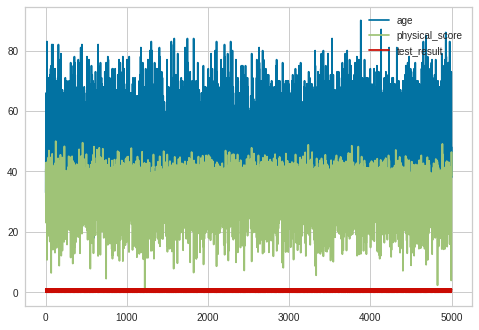

In [ ]:
df.plot()
plt.show()

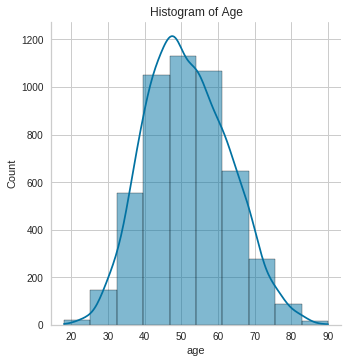

In [ ]:
sns.displot(df["age"], bins=10, kde=True)
plt.title("Histogram of Age")
plt.show()

In [ ]:
np.round(df["age"].skew()) # The skewness is zero, hence this column follows a normal distribution

0.0

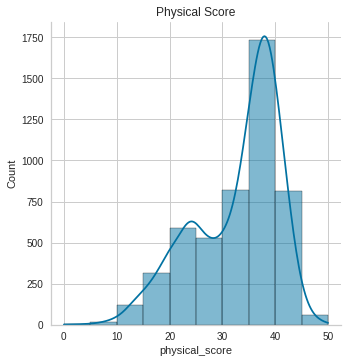

In [ ]:
sns.displot(df["physical_score"], bins=10, kde=True)
plt.title("Physical Score")
plt.show()

In [ ]:
np.round(df["physical_score"].skew()) # The skewness is zero, hence this column follows a normal distribution

-1.0

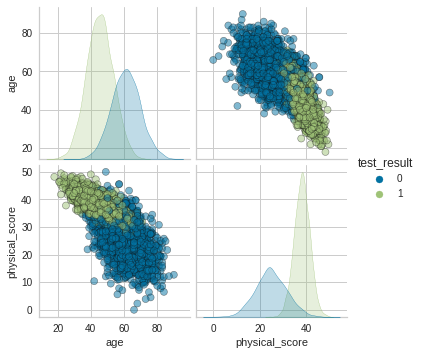

In [ ]:
# pairplot with hue diagnosis
sns.pairplot(df,diag_kind="kde", hue ='test_result',plot_kws={'alpha':0.5, 'edgecolor': 'k'})
plt.show()

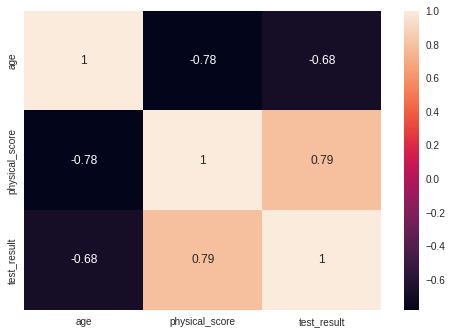

In [ ]:
# Checking for correlations between independent and dependent variable
sns.heatmap(df.corr(),annot=True)

In [ ]:
data_train = df.sample(frac=0.8, random_state= 23)

In [ ]:
data_train.shape

(4000, 3)

In [ ]:
data_train.head()

age  physical_score  test_result
1650   54            34.0            1
951    58            22.4            0
3222   48            41.5            1
2229   45            36.7            1
431    81            23.9            0

In [ ]:
data_test = df.drop(data_train.index)

In [ ]:
data_test.shape

(1000, 3)

In [ ]:
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [ ]:
data_test.head()

age  physical_score  test_result
0   39            42.1            1
1   45            39.8            1
2   65            20.8            0
3   43            39.1            1
4   68            23.3            0

In [ ]:
!pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Model Building

In [ ]:
# If you run and it gives you error, re-start and run the entire code for it to work properly. 
# The dependecies hasn't been updated yet by pycaret
clf = setup(data=data_train, target = "test_result", session_id = 123)

Description             Value
0                               session_id               123
1                                   Target       test_result
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (4000, 3)
5                           Missing Values             False
6                         Numeric Features                 2
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (2799, 2)
12                    Transformed Test Set         (1201, 2)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4637
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='test_result', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.9325  0.9763  0.9627  0.9270   
gbc          Gradient Boosting Classifier    0.9257  0.9720  0.9621  0.9175   
ada                  Ada Boost Classifier    0.9221  0.9628  0.9633  0.9111   
lda          Linear Discriminant Analysis    0.9221  0.9670  0.9783  0.8997   
knn                K Neighbors Classifier    0.9218  0.9541  0.9561  0.9164   
ridge                    Ridge Classifier    0.9218  0.0000  0.9783  0.8992   
lightgbm  Light Gradient Boosting Machine    0.9218  0.9676  0.9561  0.9163   
lr                    Logistic Regression    0.9214  0.9669  0.9495  0.9212   
nb                            Naive Bayes    0.9193  0.9703  0.9363  0.9288   
rf               Random Forest Classifier    0.9071  0.9580  0.9314  0.9143   
et                 Extra Trees Classifier    0.9021  0.9335  0.9248  0.9122   
dt               Decision Tree Classifier    0.8907  0.8949  0.9020  0.9135   
svm                   SVM - Linear Kernel    0.8856  0.0000  0.9038  0.9106   
dummy                    Dummy Classifier    0.5941  0.5000  1.0000  0.5941   

              F1   Kappa     MCC  TT (Sec)  
qda       0.9443  0.8586  0.8602     0.044  
gbc       0.9391  0.8440  0.8462     0.520  
ada       0.9363  0.8362  0.8388     0.347  
lda       0.9373  0.8350  0.8405     0.046  
knn       0.9356  0.8360  0.8377     0.063  
ridge     0.9370  0.8342  0.8398     0.049  
lightgbm  0.9356  0.8360  0.8377     0.377  
lr        0.9349  0.8357  0.8369     0.605  
nb        0.9323  0.8322  0.8328     0.037  
rf        0.9226  0.8065  0.8074     1.069  
et        0.9182  0.7963  0.7972     0.664  
dt        0.9074  0.7740  0.7750     0.062  
svm       0.9018  0.7640  0.7760     0.077  
dummy     0.7454  0.0000  0.0000     0.021

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


# Without Hyperparameter Tuning

In [ ]:
NO_HYPER_TUNE=create_model("qda")  # CROSS VAL SCORE 

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9357  0.9685  0.9641  0.9306  0.9471  0.8653  0.8662
1       0.9429  0.9793  0.9760  0.9314  0.9532  0.8799  0.8815
2       0.9393  0.9833  0.9760  0.9261  0.9504  0.8722  0.8742
3       0.9643  0.9896  0.9819  0.9588  0.9702  0.9256  0.9260
4       0.9214  0.9773  0.9458  0.9235  0.9345  0.8363  0.8367
5       0.9143  0.9562  0.9819  0.8859  0.9314  0.8179  0.8257
6       0.9036  0.9627  0.9518  0.8927  0.9213  0.7972  0.7999
7       0.9429  0.9775  0.9639  0.9412  0.9524  0.8810  0.8814
8       0.9500  0.9841  0.9639  0.9524  0.9581  0.8961  0.8962
9       0.9104  0.9843  0.9217  0.9273  0.9245  0.8143  0.8144
Mean    0.9325  0.9763  0.9627  0.9270  0.9443  0.8586  0.8602
Std     0.0184  0.0101  0.0179  0.0219  0.0150  0.0387  0.0377

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


# Hyperparameter Tuning

In [ ]:
HYPER_TUNE = tune_model(best_model) 

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9393  0.9686  0.9581  0.9412  0.9496  0.8733  0.8736
1       0.9393  0.9790  0.9581  0.9412  0.9496  0.8733  0.8736
2       0.9286  0.9833  0.9581  0.9249  0.9412  0.8503  0.8512
3       0.9607  0.9897  0.9759  0.9586  0.9672  0.9183  0.9185
4       0.9179  0.9776  0.9337  0.9281  0.9309  0.8296  0.8296
5       0.9143  0.9563  0.9759  0.8901  0.9310  0.8185  0.8245
6       0.9000  0.9623  0.9458  0.8920  0.9181  0.7900  0.7922
7       0.9357  0.9775  0.9518  0.9405  0.9461  0.8665  0.8666
8       0.9500  0.9839  0.9578  0.9578  0.9578  0.8964  0.8964
9       0.9140  0.9843  0.9217  0.9329  0.9273  0.8220  0.8221
Mean    0.9300  0.9763  0.9537  0.9307  0.9419  0.8538  0.8548
Std     0.0176  0.0101  0.0160  0.0224  0.0143  0.0372  0.0363

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


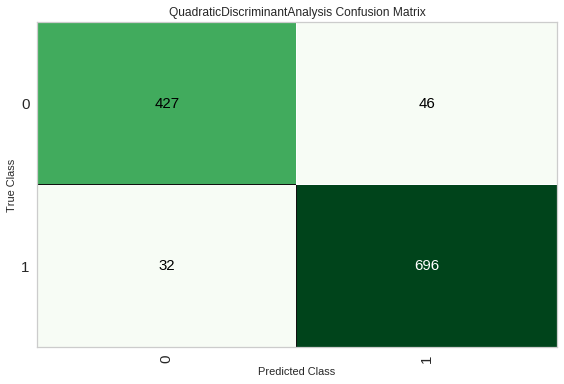

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(HYPER_TUNE, plot="confusion_matrix")

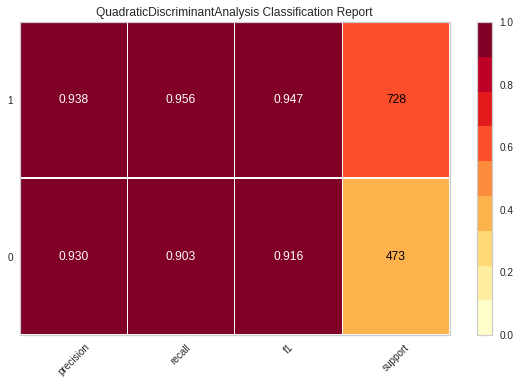

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(HYPER_TUNE, plot="class_report")

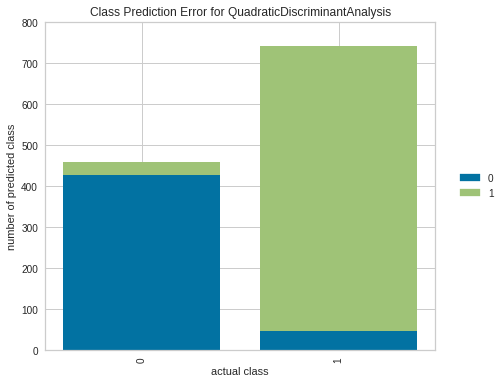

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(HYPER_TUNE, plot="error")

In [ ]:
evaluate_model(HYPER_TUNE)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
FINAL_MODEL=finalize_model(HYPER_TUNE)
print(FINAL_MODEL)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:lo

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)


# Test Prediction

In [ ]:
TEST_PREDICTION=predict_model(FINAL_MODEL, data=data_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Quadratic Discriminant Analysis     0.917  0.9709  0.9425  0.9228  0.9326   

    Kappa    MCC  
0  0.8247  0.825

In [ ]:
TEST_PREDICTION.head(10)

age  physical_score  test_result  Label   Score
0   39            42.1            1      1  0.9977
1   45            39.8            1      1  0.9912
2   65            20.8            0      0  1.0000
3   43            39.1            1      1  0.9939
4   68            23.3            0      0  1.0000
5   24            46.9            1      1  0.9999
6   42            39.3            1      1  0.9951
7   66            20.7            0      0  1.0000
8   52            35.4            0      1  0.9287
9   69            17.6            0      0  1.0000

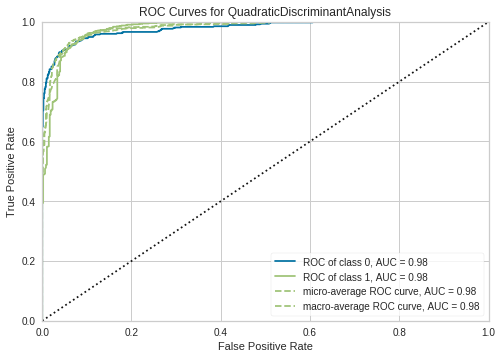

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = HYPER_TUNE, plot = 'auc')

In [ ]:
#FINAL_MODEL.feature_importances_

In [ ]:
evaluate_model(FINAL_MODEL)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

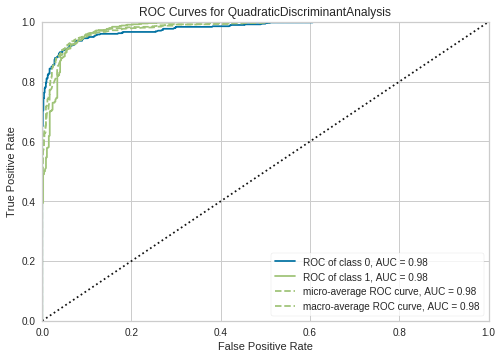

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(FINAL_MODEL, plot = 'auc') 

In [ ]:
create_app(FINAL_MODEL)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as       age  physical_score  test_result
0      54            34.0            1
1      58            22.4            0
2      48            41.5            1
3      45            36.7            1
4      81            23.9            0
...   ...             ...          ...
3995   41            38.9            1
3996   71            18.7            0
3997   35            40.4            1
3998   54            30.5            0
3999   62            17.0            0

[4000 rows x 3 columns]
INFO:logs:get_config() succesfully completed......................................
INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=prep_pipe)
INFO:logs:Global variable: prep_pipe returned as Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                  

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
!pip install explainerdashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 279 kB 28.9 MB/s 
     |████████████████████████████████| 57 kB 4.9 MB/s 
     |████████████████████████████████| 47 kB 4.9 MB/s 
     |████████████████████████████████| 9.7 MB 43.9 MB/s 
     |████████████████████████████████| 470 kB 68.3 MB/s 
     |████████████████████████████████| 72 kB 960 kB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 136 kB 60.4 MB/s 
  Created wheel for dash-auth: filename=dash_auth-1.4.1-py3-none-any.whl size=476152 sha256=3e635ca86d877cad0cdd6713f5a27dbf6bd930a4f65cb4baf7763ac777a49df3
  Stored in directory: /root/.cache/pip/wheels/49/39/d4/8b86e01a8b6c9fd63051de54f4ebb256e85d9759505d749c37
Successfully built dash-auth
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully unins

In [ ]:
#dashboard(FINAL_MODEL, display_format="inline")

In [ ]:
dashboard(FINAL_MODEL, display_format="dash", run_kwargs={"port":7000})

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=prep_pipe)
INFO:logs:Global variable: prep_pipe returned as Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='test_result', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
           

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/1201 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:7000
You can terminate the dashboard with ExplainerDashboard.terminate(7000)
Dash app running on:


<IPython.core.display.Javascript object>